In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import scipy as sp
import sklearn as sk # data mining tools
import matplotlib.pylab as plt # plotting
import seaborn as sns # advanced plotting
import ast
import collections
import re 
import six
from sklearn.preprocessing import MinMaxScaler
pd.options.display.max_colwidth = 100
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('ted_main_dummy_columns.csv')

Importing necessary libraries for Decision Tree.

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Creating features to use in decision tree.

In [5]:
rating_list = ['positive_ratings', 'negative_ratings', 'neutral_ratings']

In [6]:
attributes = ['duration', 'languages', 'num_speaker', 'Literature', 'Art' ,'Economy_Politics', 'Medicine',
             'Academy', 'Engineering_Science', 'Other_Occupations',
             'speaker_trend', 'tags_trend', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday',
              'funny_factor', 'TEDx', 'TED', 'TED_Global', 'TED_Other', 'Non_TED_University', 'Non_TED_Other']
#attributes = ['duration', 'num_speaker', 'Literature', 'Art' ,'Economy_Politics', 'Medicine',
#             'Academy', 'Engineering_Science', 'Other_Occupations',
#             'speaker_trend', 'tags_trend', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday',
#              'TEDx', 'TED', 'TED_Global', 'TED_Other', 'Non_TED_University', 'Non_TED_Other']
#attributes = ['languages','Art','tags_trend','duration','Economy_Politics','TED_Global','speaker_trend' ]
#attributes = ['duration','speaker_trend', 'Monday','tags_trend', 'Literature']

Splitting dataset into test set and train set.

In [7]:
X = df[attributes].values
y = df['popularity_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=100
                                                    ,stratify=y)

Creating Decision Tree classifier. And fitting our data in model.

In [8]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, 
                             min_samples_split=5, min_samples_leaf=50)
#clf = DecisionTreeClassifier(criterion='gini', max_depth=3, 
#                             min_samples_split=2, min_samples_leaf=1)

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [10]:
import os
#os.environ['PATH'] += os.pathsep + 'C:/Users/selam/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'
os.environ['PATH'] += os.pathsep + 'C:/Users/selam/Anaconda3/Library/bin/graphviz'


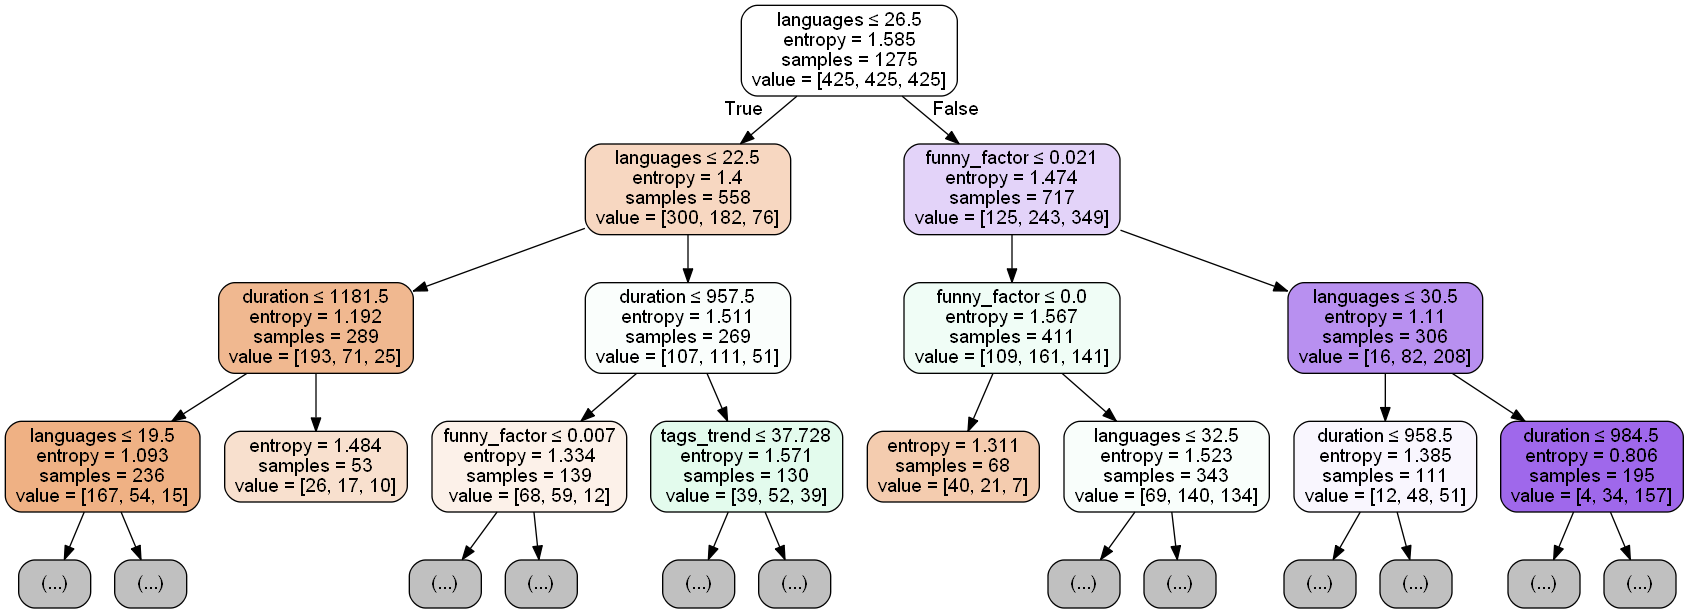

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes,   
                                filled=True, rounded=True,  
                                special_characters=True,max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Predicting train set using our model.

In [12]:
y_train_pred = clf.predict(X_train)

Showing different metrics for our train set.

In [13]:
print('Precision %s' % precision_score(y_train, y_train_pred, average='micro'))
print('Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('F1-score %s' % f1_score(y_train, y_train_pred, average='micro'))

Precision 0.5772549019607843
Accuracy 0.5772549019607843
F1-score 0.5772549019607843


In [14]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64       425
           1       0.46      0.43      0.44       425
           2       0.67      0.61      0.64       425

    accuracy                           0.58      1275
   macro avg       0.58      0.58      0.58      1275
weighted avg       0.58      0.58      0.58      1275



Predicting test set using our model.

In [15]:
y_test_pred = clf.predict(X_test)
print('Precision %s' % precision_score(y_test, y_test_pred, average='micro'))

Precision 0.56


## Misclassified  Talks

In [16]:
Actual_popclass = y_test.to_frame()
Predicted_popclass = pd.DataFrame(y_test_pred, columns=['Predicted_class']).set_index(Actual_popclass.index)


In [17]:
Test_set = pd.DataFrame(X_test, columns = attributes)
Test_set

,duration,languages,num_speaker,Literature,Art,Economy_Politics,Medicine,Academy,Engineering_Science,Other_Occupations,...,Friday,Saturday,Sunday,funny_factor,TEDx,TED,TED_Global,TED_Other,Non_TED_University,Non_TED_Other
0,575.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.013946,0.0,1.0,0.0,0.0,0.0,0.0
1,716.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.027282,0.0,1.0,0.0,0.0,0.0,0.0
2,250.0,57.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.061857,0.0,0.0,0.0,1.0,0.0,0.0
3,255.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.015373,0.0,1.0,0.0,0.0,0.0,0.0
4,390.0,33.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.013844,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,568.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.000025,0.0,1.0,0.0,0.0,0.0,0.0
1271,848.0,21.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.020296,1.0,0.0,0.0,0.0,0.0,0.0
1272,366.0,34.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000280,0.0,0.0,0.0,1.0,0.0,0.0
1273,759.0,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.007037,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
False_postive = pd.merge(Actual_popclass, Predicted_popclass, left_index=True, right_index=True).reset_index(drop= True)
Test_TED_Talks = pd.merge(Test_set, False_postive, left_index=True, right_index=True)
Mis_classfied = Test_TED_Talks.loc[(Test_TED_Talks.popularity_class != Test_TED_Talks.Predicted_class)]
Mis_classfied.head(1)

,duration,languages,num_speaker,Literature,Art,Economy_Politics,Medicine,Academy,Engineering_Science,Other_Occupations,...,Sunday,funny_factor,TEDx,TED,TED_Global,TED_Other,Non_TED_University,Non_TED_Other,popularity_class,Predicted_class
0,575.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.013946,0.0,1.0,0.0,0.0,0.0,0.0,0,1


## Tree to Rules 

In [19]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):

    '''
    Outputs a decision tree model as a Python function
    
    Parameters:
    -----------
    tree: decision tree model
        The feature names of the dataset used for building the decision tree
    '''

    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]
    #print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [20]:
tree_to_code(clf, attributes)

  if languages <= 26.5:
    if languages <= 22.5:
      if duration <= 1181.5:
        if languages <= 19.5:
          return [[96. 21.  8.]]
        else:  # if languages > 19.5
          return [[71. 33.  7.]]
      else:  # if duration > 1181.5
        return [[26. 17. 10.]]
    else:  # if languages > 22.5
      if duration <= 957.5:
        if funny_factor <= 0.007329421583563089:
          return [[33. 20.  2.]]
        else:  # if funny_factor > 0.007329421583563089
          return [[35. 39. 10.]]
      else:  # if duration > 957.5
        if tags_trend <= 37.728153228759766:
          return [[12. 26. 15.]]
        else:  # if tags_trend > 37.728153228759766
          return [[27. 26. 24.]]
  else:  # if languages > 26.5
    if funny_factor <= 0.020639320835471153:
      if funny_factor <= 0.0001399850007146597:
        return [[40. 21.  7.]]
      else:  # if funny_factor > 0.0001399850007146597
        if languages <= 32.5:
          return [[53. 87. 61.]]
        else:  # i

### Cross Validation 

In [21]:
from sklearn.model_selection import cross_val_score

Using Cross Validation and seeing the precision for our test set.

In [271]:
precision_cross_scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='precision_micro')
print('Precision: %0.4f (+/- %0.2f)' % (precision_cross_scores.mean(), precision_cross_scores.std() * 2))

Precision: 0.5562 (+/- 0.07)
